In [1]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [2]:
# mpl.rcParams['font.sans-serif'] = [u'SimHei']
# mpl.rcParams['axes.unicode_minus'] = False

iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'


def expand(a, b, rate=0.05):
    d = (b - a) * rate
    return a-d, b+d

实际均值 = 
[[ 5.006  3.418]
 [ 5.936  2.77 ]
 [ 6.588  2.974]]
预测均值 = 
[[ 5.01494511  3.44040237]
 [ 6.69225795  3.03018616]
 [ 5.90652226  2.74740414]]
预测方差 = 
[[[ 0.11948421  0.08969613]
  [ 0.08969613  0.12149899]]

 [[ 0.3588512   0.05091598]
  [ 0.05091598  0.08956947]]

 [[ 0.27590209  0.08910477]
  [ 0.08910477  0.09414053]]]
顺序：	[0 2 1]
准确率：78.67%
实际均值 = 
[[ 5.006  1.464]
 [ 5.936  4.26 ]
 [ 6.588  5.552]]
预测均值 = 
[[ 5.0060006   1.46399865]
 [ 6.04240777  4.41742864]
 [ 6.58888904  5.63329718]]
预测方差 = 
[[[ 0.12176525  0.01581631]
  [ 0.01581631  0.0295045 ]]

 [[ 0.28119672  0.23746926]
  [ 0.23746926  0.31503012]]

 [[ 0.48521779  0.36602418]
  [ 0.36602418  0.32601109]]]
顺序：	[0 1 2]
准确率：91.33%
实际均值 = 
[[ 5.006  0.244]
 [ 5.936  1.326]
 [ 6.588  2.026]]
预测均值 = 
[[ 5.00605757  0.23727675]
 [ 6.57289666  2.05192938]
 [ 5.977111    1.33910201]]
预测方差 = 
[[[ 0.12407758  0.01055895]
  [ 0.01055895  0.00905628]]

 [[ 0.4171415   0.05278455]
  [ 0.05278455  0.06790735]]

 [[ 0.30671183  

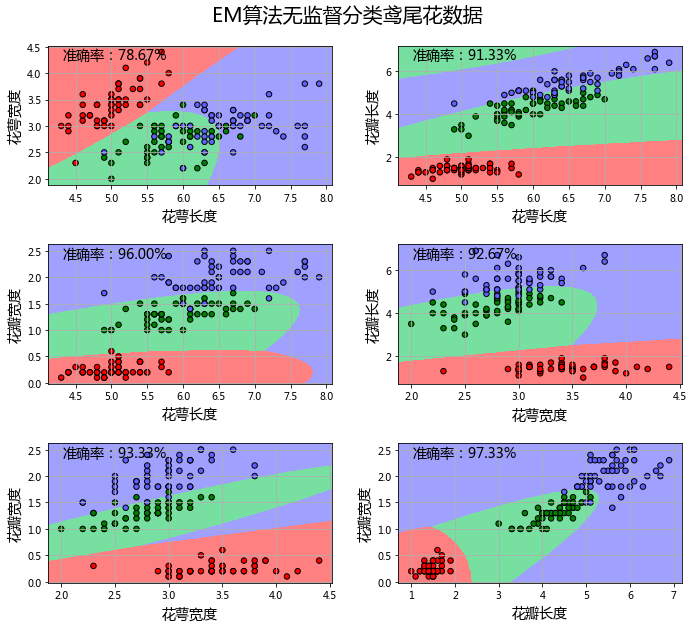

In [3]:
if __name__ == '__main__':
    path = '../8.Regression/iris.data'
    data = pd.read_csv(path, header=None)
    x_prime, y = data[np.arange(4)], data[4]
    y = pd.Categorical(y).codes

    n_components = 3
    feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
    plt.figure(figsize=(10, 9), facecolor='#FFFFFF')
    for k, pair in enumerate(feature_pairs):
        x = x_prime[pair]
        m = np.array([np.mean(x[y == i], axis=0) for i in range(3)])  # 均值的实际值
        print '实际均值 = \n', m

        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
        gmm.fit(x)
        print '预测均值 = \n', gmm.means_
        print '预测方差 = \n', gmm.covariances_
        y_hat = gmm.predict(x)
        order = pairwise_distances_argmin(m, gmm.means_, axis=1, metric='euclidean')
        print '顺序：\t', order

        n_sample = y.size
        n_types = 3
        change = np.empty((n_types, n_sample), dtype=np.bool)
        for i in range(n_types):
            change[i] = y_hat == order[i]
        for i in range(n_types):
            y_hat[change[i]] = i
        acc = u'准确率：%.2f%%' % (100*np.mean(y_hat == y))
        print acc

        cm_light = mpl.colors.ListedColormap(['#FF8080', '#77E0A0', '#A0A0FF'])
        cm_dark = mpl.colors.ListedColormap(['r', 'g', '#6060FF'])
        x1_min, x2_min = x.min()
        x1_max, x2_max = x.max()
        x1_min, x1_max = expand(x1_min, x1_max)
        x2_min, x2_max = expand(x2_min, x2_max)
        x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
        grid_test = np.stack((x1.flat, x2.flat), axis=1)
        grid_hat = gmm.predict(grid_test)

        change = np.empty((n_types, grid_hat.size), dtype=np.bool)
        for i in range(n_types):
            change[i] = grid_hat == order[i]
        for i in range(n_types):
            grid_hat[change[i]] = i

        grid_hat = grid_hat.reshape(x1.shape)
        plt.subplot(3, 2, k+1)
        plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
        plt.scatter(x[pair[0]], x[pair[1]], s=30, c=y, marker='o', cmap=cm_dark, edgecolors='k')
        xx = 0.95 * x1_min + 0.05 * x1_max
        yy = 0.1 * x2_min + 0.9 * x2_max
        plt.text(xx, yy, acc, fontsize=14)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.xlabel(iris_feature[pair[0]], fontsize=14)
        plt.ylabel(iris_feature[pair[1]], fontsize=14)
        plt.grid()
    plt.tight_layout(2)
    plt.suptitle(u'EM算法无监督分类鸢尾花数据', fontsize=20)
    plt.subplots_adjust(top=0.92)
    plt.show()